In [6]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

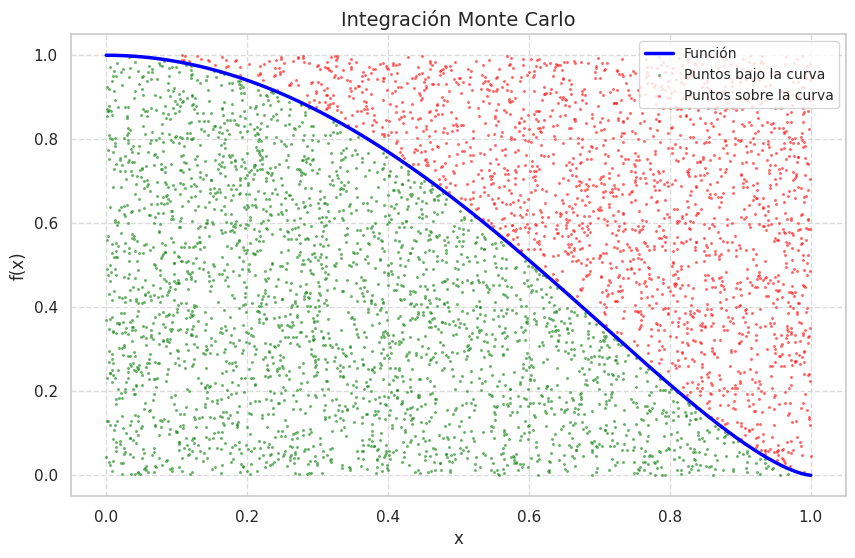

La aproximación de la integral es: 0.6


In [9]:
def monte_carlo_integration(func, a, b, num_points=10000, visualize=False):

    # Generar puntos aleatorios
    x_random = np.random.uniform(a, b, num_points)
    y_max = max(func(x) for x in np.linspace(a, b, 1000))
    y_random = np.random.uniform(0, y_max, num_points)

    # Identificar puntos bajo y sobre la curva
    under_curve = y_random <= func(x_random)
    over_curve = ~under_curve

    # Calcular el área bajo la curva
    area_rectangle = (b - a) * y_max
    integral = (under_curve.sum() / num_points) * area_rectangle

    if visualize:
        # Gráfico con seaborn
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))

        # Curva de la función
        x = np.linspace(a, b, 1000)
        y = func(x)
        sns.lineplot(x=x, y=y, label='Función', color='blue', linewidth=2.5)

        # Puntos bajo la curva
        sns.scatterplot(x=x_random[under_curve], y=y_random[under_curve],
                        color='green', s=5, label='Puntos bajo la curva', alpha=0.6)

        # Puntos sobre la curva
        sns.scatterplot(x=x_random[over_curve], y=y_random[over_curve],
                        color='red', s=5, label='Puntos sobre la curva', alpha=0.6)

        # Configuración del gráfico
        plt.title('Integración Monte Carlo', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('f(x)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    return integral

# Definir la función a integrar
def function_to_integrate(x):
    return (1-x**2)**(3/2)

# Parámetros de la integral
a = 0  # Límite inferior
b = 1  # Límite superior
num_points = 5000  # Número de puntos aleatorios

# Calcular la integral con visualización
result = monte_carlo_integration(function_to_integrate, a, b, num_points, visualize=True)
print(f"La aproximación de la integral es: {result}")